<a href="https://colab.research.google.com/github/Annette-1/Ecuaciones_Diferenciales_Parciales/blob/main/Prueba_de_Frecuencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:purple;">PRUEBA DE FRECUENCIAS </span>
<span style="color:purple;"></span>

1. Hipótesis del Contraste
Se plantea el siguiente contraste de hipótesis:

* Hipótesis nula ($H_0$): Los datos provienen de una distribución uniforme en el intervalo $[0,1]$, es decir, $X \sim U(0,1)$

* Hipótesis alternativa ($H_1$): Los datos no provienen de una distribución uniforme $U(0,1)$



In [114]:
import numpy as np #esta libereria es para hacer calculos númericos
import scipy.stats as st # sirve para realizar análisis estadísticos y trabajar con distribuciones de probabilidad.
import pandas as pd #Permite leer y escribir fácilmente ficheros en formato CSV, Excel y bases de datos SQL
from tabulate import tabulate #Esta libreria sirve para crear tablas
import matplotlib.pyplot as plt #graficas

In [115]:
#Datos de la tabla 3.1 de los numeros pseudoaleatorios
# Datos originales
data = [
0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
0.79882, 0.45679, 0.21631, 0.87616, 0.55743,
0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
0.58244, 0.85853, 0.86752, 0.38729, 0.15506,
0.23949, 0.53559, 0.33381, 0.49883, 0.75103,
0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]

Definimos la funcion pra prueba de Frecuencias o bien "Prueba de bondad de ajuste".

2. Procedimiento de la Prueba
* División en Intervalos
Se divide el intervalo $[0,1]$ en $k$ intervalos de igual amplitud. Para este caso particular, consideramos $k = 5$ intervalos:

$[0,0.2)$,$[0.2,0.4)$,$[0.4,0.6)$,$[0.6,0.8)$,$[0.8,1.0]$

* Cada intervalo tiene una amplitud de $\Delta = 0.2$.

In [116]:
# Definir los intervalos (bins)
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.01]  # 1.01 para incluir el 1.0
etiquetas = ['[0-0.2]', '[0.2-0.4]', '[0.4-0.6]', '[0.6-0.8]', '[0.8-1.0]']  #sirve como etiquetas y mas adelante usarlo en la tabla

In [117]:
# Creamos un DataFrame con los datos
df = pd.DataFrame(data, columns=['valores'])

Asignamos el intervalo a cada valor


In [118]:
df['intervalo'] = pd.cut(df['valores'], bins=bins, labels=etiquetas, right=False, include_lowest=True)

Calculamos las frecuencias observadas dada por:

Sea $n$ el tamaño total de la muestra. Para cada intervalo $i$ ($i = 1, 2, \ldots, k$),

se define: $O_i=$ frecuencia observada en el intervalo $i$

es decir, el número de datos muestrales que caen dentro del intervalo $i$.

In [119]:
# Calcular frecuencias observadas (f0)
frecuencias = df['intervalo'].value_counts().sort_index().reset_index()
frecuencias.columns = ['Intervalo', 'f_observado']


 Calculamos las Frecuencias Esperadas Bajo $H_0$

Si la hipótesis nula es cierta y los datos siguen una distribución $U(0,1)$, la probabilidad de que un dato caiga en cualquier intervalo es:

$$p_i=\frac{1}{k}=\frac{1}{5}$$

Por lo tanto, la frecuencia esperada para cada intervalo bajo $H_0$ es:
$$E_i=np_i=\frac{n}{k}$$

In [120]:
# Calcular frecuencias esperadas para distribución uniforme U(0,1)
n_total = len(data)
frecuencias['f_esperado'] = n_total * 0.2  # 20% en cada intervalo (ancho 0.2)

Calcular SOLO la columna para Chi-cuadrado (sin mostrar $f₀ - f_e $ y $(f₀ - f_e)²$) esto se puede omitir no afecta los calculos


In [121]:
frecuencias['(fo - fe)² / fe'] = (frecuencias['f_esperado'] - frecuencias['f_observado'])**2 / frecuencias['f_observado']

Estadístico de Prueba

El estadístico de prueba Chi-cuadrado se define como:
$$χ^2=∑_{i=1}^k\frac{(O_i - E_i)^2}{E_i}$$

Este estadístico mide la discrepancia entre las frecuencias observadas y las esperadas bajo la hipótesis nula.

* Distribución del Estadístico
Bajo la hipótesis nula, el estadístico $\chi^2_{\text{calc}}$ sigue aproximadamente una distribución Chi-cuadrado con:

grados de libertad $=k−1$

In [122]:
# Realizar prueba de bondad de ajuste Chi-cuadrado
chi2, p_valor = st.chisquare(frecuencias['f_observado'], f_exp=frecuencias['f_esperado'])
grados_libertad = len(frecuencias) - 1
chi2_critico = st.chi2.ppf(0.5, grados_libertad)  # alfa = 0.5

In [123]:
# Creamos la tabla con tabulate
print("\n" + "="*80)  #esto sirve como mebretes de separacion
print("Tabla de Frecuencias")
print("="*80)
tabla = tabulate(frecuencias,
                 headers=['Intervalo', 'fo (Observado)', 'fe (Esperado)',
                          '(fo - fe)² / fe'],
                 tablefmt='grid',
                 floatfmt='.4f',
                 showindex=False)

print(tabla)



Tabla de Frecuencias
+-------------+------------------+-----------------+-------------------+
| Intervalo   |   fo (Observado) |   fe (Esperado) |   (fo - fe)² / fe |
+=============+==================+=================+===================+
| [0-0.2]     |               21 |         20.0000 |            0.0476 |
+-------------+------------------+-----------------+-------------------+
| [0.2-0.4]   |               22 |         20.0000 |            0.1818 |
+-------------+------------------+-----------------+-------------------+
| [0.4-0.6]   |               19 |         20.0000 |            0.0526 |
+-------------+------------------+-----------------+-------------------+
| [0.6-0.8]   |               23 |         20.0000 |            0.3913 |
+-------------+------------------+-----------------+-------------------+
| [0.8-1.0]   |               15 |         20.0000 |            1.6667 |
+-------------+------------------+-----------------+-------------------+


Creamos los histogramas


GRÁFICAS DE HISTOGRAMAS - VALORES OBSERVADOS VS ESPERADOS

ESTADÍSTICOS DESCRIPTIVOS:
Media muestral: 0.4827 (esperada para U(0,1): 0.5)
Varianza muestral: 0.0762 (esperada para U(0,1): 0.0833)
Tamaño de muestra: 100


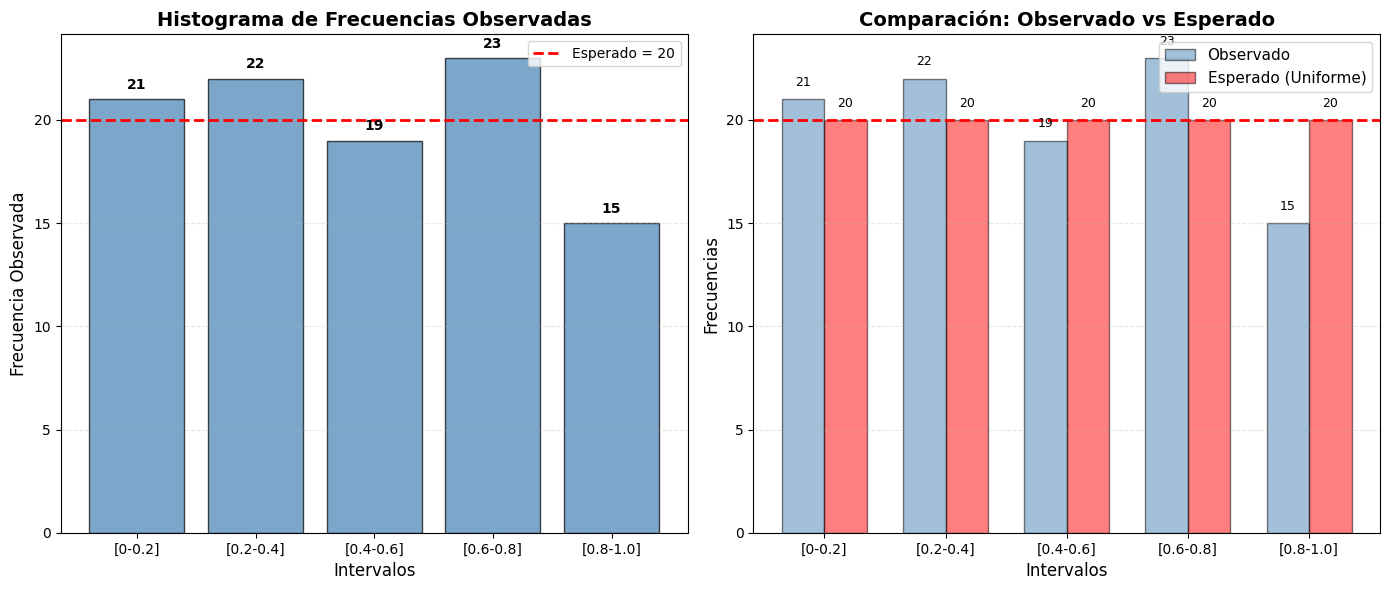

In [124]:
print("\n" + "="*90)
print("GRÁFICAS DE HISTOGRAMAS - VALORES OBSERVADOS VS ESPERADOS")
print("="*90)
# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 1. HISTOGRAMA DE FRECUENCIAS OBSERVADAS
ax1.bar(etiquetas, frecuencias['f_observado'],
        color='steelblue', edgecolor='black', alpha=0.7, width=0.8)
ax1.set_xlabel('Intervalos', fontsize=12)
ax1.set_ylabel('Frecuencia Observada', fontsize=12)
ax1.set_title('Histograma de Frecuencias Observadas', fontsize=14, fontweight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.3)

# AÑADIR LÍNEA ROJA HORIZONTAL EN Y=20
ax1.axhline(y=20, color='red', linestyle='--', linewidth=2, label='Esperado = 20')
ax1.legend(loc='upper right')

# Añadir valores sobre las barras
for i, v in enumerate(frecuencias['f_observado']):
    ax1.text(i, v + 0.5, str(int(v)), ha='center', fontweight='bold')

# 2. HISTOGRAMA COMPARATIVO (OBSERVADO VS ESPERADO)
x = np.arange(len(etiquetas))  # Posiciones en el eje x
width = 0.35  # Ancho de las barras

# Barras para observado y esperado
bars1 = ax2.bar(x - width/2, frecuencias['f_observado'], width,
                label='Observado', color='steelblue', edgecolor='black', alpha=0.5)
bars2 = ax2.bar(x + width/2, frecuencias['f_esperado'], width,
                label='Esperado (Uniforme)', color='red', edgecolor='black', alpha=0.5)

ax2.set_xlabel('Intervalos', fontsize=12)
ax2.set_ylabel('Frecuencias', fontsize=12)
ax2.set_title('Comparación: Observado vs Esperado', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(etiquetas)
ax2.legend(loc='upper right', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.3)
ax2.axhline(y=20, color='red', linestyle='--', linewidth=2, label='Esperado = 20')

# Añadir valores sobre las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Ajustar layout
plt.tight_layout()

# Mostrar estadísticos descriptivos en la consola
print("\nESTADÍSTICOS DESCRIPTIVOS:")
print(f"Media muestral: {np.mean(data):.4f} (esperada para U(0,1): 0.5)")
print(f"Varianza muestral: {np.var(data):.4f} (esperada para U(0,1): 0.0833)")
print(f"Tamaño de muestra: {n_total}")
# Mostrar las gráficas
plt.show()

In [125]:
# Mostrar resultados de la prueba
print("\n" + "="*90)
print("RESULTADOS DE LA PRUEBA DE BONDAD DE AJUSTE")
print("="*90)
print(f"Estadístico Chi-cuadrado (χ² calculado): {chi2:.4f}")
print(f"Grados de libertad: {grados_libertad}")
print(f"Valor crítico (χ² crítico) para α=0.5: {chi2_critico:.4f}")
print(f"Valor p: {p_valor:.4f}")
print(f"Nivel de significancia (α): 0.5")
print("-"*90)
# Conclusión final
print("\nCONCLUSIÓN:")
if p_valor > 0.5:
    print(" NO SE RECHAZA la hipótesis nula (H₀)")
    print("   No hay evidencia suficiente para concluir que los datos NO siguen una distribución uniforme U(0,1)")
else:
    print("SE RECHAZA la hipótesis nula (H₀)")
    print("   Hay evidencia suficiente para concluir que los datos NO siguen una distribución uniforme U(0,1)")





RESULTADOS DE LA PRUEBA DE BONDAD DE AJUSTE
Estadístico Chi-cuadrado (χ² calculado): 2.0000
Grados de libertad: 4
Valor crítico (χ² crítico) para α=0.5: 3.3567
Valor p: 0.7358
Nivel de significancia (α): 0.5
------------------------------------------------------------------------------------------

CONCLUSIÓN:
 NO SE RECHAZA la hipótesis nula (H₀)
   No hay evidencia suficiente para concluir que los datos NO siguen una distribución uniforme U(0,1)
